# Pilot data analysis

In this pilot dataset, we have 4 participants with two sessions, varying distractor prevalence 0.9 and 0.5. 

In [1]:
# import data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# scan the current folder for csv files, and loop through them in order to import them using read_csv
# then conctaenate them into one dataframe
path = os.getcwd()
# list all files with csv extension
files_csv = glob.glob(os.path.join(path, "*.csv"))
raw = pd.concat([pd.read_csv(f) for f in files_csv], ignore_index = True)
raw.head()

,pos1,pos2,pos3,pos4,pos5,pos6,shape1,shape2,shape3,shape4,...,end_key.rt,participant,session,distractor_prevalence,validity,date,expName,psychopyVersion,frameRate,Unnamed: 35
0,5.0,4.0,2.0,3.0,1.0,0.0,4.0,5.0,3.0,0.0,...,NaN,pil_001,1,0.5,1.0,2023-03-22_11h50.44.873,stress,2023.1.0,60.019975,NaN
1,5.0,0.0,3.0,1.0,4.0,2.0,4.0,6.0,5.0,0.0,...,NaN,pil_001,1,0.5,1.0,2023-03-22_11h50.44.873,stress,2023.1.0,60.019975,NaN
2,5.0,4.0,1.0,0.0,3.0,2.0,4.0,6.0,0.0,5.0,...,NaN,pil_001,1,0.5,1.0,2023-03-22_11h50.44.873,stress,2023.1.0,60.019975,NaN
3,3.0,1.0,5.0,0.0,2.0,4.0,4.0,0.0,0.0,6.0,...,NaN,pil_001,1,0.5,1.0,2023-03-22_11h50.44.873,stress,2023.1.0,60.019975,NaN
4,3.0,2.0,5.0,1.0,4.0,0.0,4.0,3.0,0.0,6.0,...,NaN,pil_001,1,0.5,1.0,2023-03-22_11h50.44.873,stress,2023.1.0,60.019975,NaN


## 1. accuracy analysis

   participant  distractor_prevalence  singleton  search_response.corr
0      pil_001                    0.5        0.0              0.963333
1      pil_001                    0.5        1.0              0.963333
2      pil_001                    0.9        0.0              1.000000
3      pil_001                    0.9        1.0              0.958333
4      pil_002                    0.5        0.0              0.990000
5      pil_002                    0.5        1.0              0.955000
6      pil_002                    0.9        0.0              1.000000
7      pil_002                    0.9        1.0              0.977778
8      pil_003                    0.5        0.0              0.985000
9      pil_003                    0.5        1.0              0.970000
10     pil_003                    0.9        0.0              1.000000
11     pil_003                    0.9        1.0              0.983333
12     pil_004                    0.5        0.0              0.995000
13    

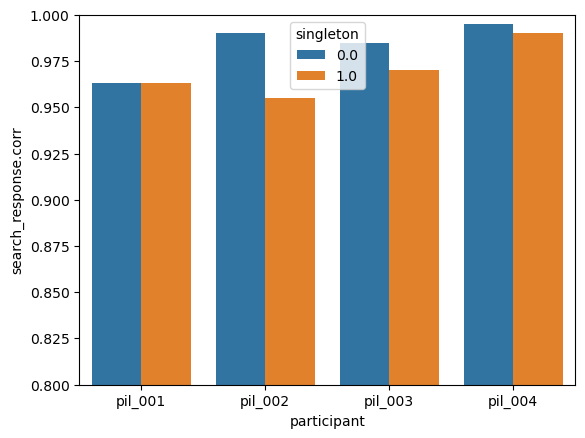

In [15]:
# calculate the mean accuracy for each participant for the singleton present vs. absent (1, 0) based on search_response.corr
# and show mean accuracy for each participant
m_accuracy = raw.groupby(['participant', 'distractor_prevalence','singleton'])['search_response.corr'].mean().reset_index()
#print(m_accuracy)
# draw a barplot to show the mean accuracy for each participant, separated by singleton present vs. absent (1,0), and distractor prevalence
sns.barplot(x='participant', y='search_response.corr', hue='singleton', data=m_accuracy.query('distractor_prevalence == 0.5'))
# set the y-axis limit to 0.8 to 1.0
plt.ylim(0.8, 1.0)
plt.show()

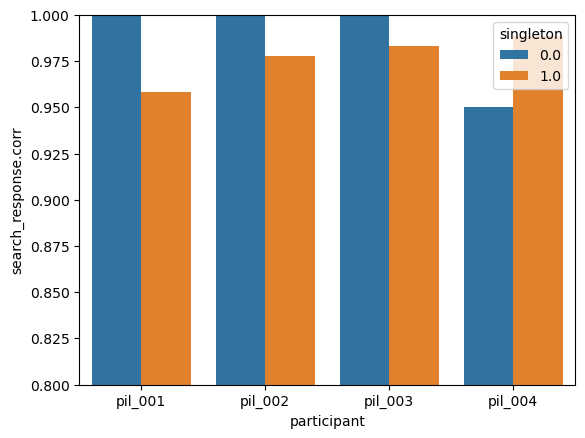

In [16]:
# singleton prevalence = 0.9
sns.barplot(x='participant', y='search_response.corr', hue='singleton', data=m_accuracy.query('distractor_prevalence == 0.9'))
# set the y-axis limit to 0.8 to 1.0
plt.ylim(0.8, 1.0)
plt.show()

Summary: in general, the accuracy is high for both distractor prevalence, above 95% for all participants. Thus, we can focus on the RT analysis.

## 2. RT analysis

First to check extreme RTs using histogram. 

<AxesSubplot:>

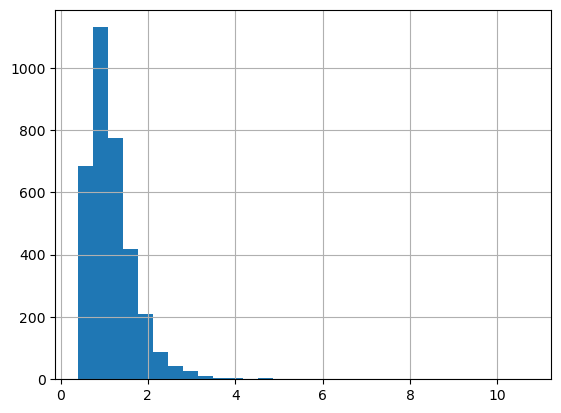

In [36]:
raw['search_response.rt'].hist(bins=30)

In [42]:
# from the raw data, filter out search_response.corr == 1, and group by participant, distractor_prevalence, singleton, for search_response.rt
# then calculate the mean search_response.rt for each participant, distractor_prevalence, singleton
# and show mean search_response.rt for each participant
m_rt = raw.query('`search_response.corr` == 1 and `search_response.rt` > .2 and `search_response.rt` < 2.5').groupby(
    [ 'distractor_prevalence','participant','singleton']).agg(
        {'search_response.rt': 'mean'}).unstack(level=2).reset_index()
#m_rt
# spread m_rt based on singleton, and reset the index
# rename the columns
m_rt.columns = [ 'distractor_prevalence','participant', 'rt_absent', 'rt_present']
# calculate the difference between rt_present and rt_absent, and add it as a new column as interference
m_rt['interference'] = (m_rt['rt_present'] - m_rt['rt_absent'])*1000 # convert to ms
m_rt

,distractor_prevalence,participant,rt_absent,rt_present,interference
0,0.5,pil_001,0.990604,0.979293,-11.310174
1,0.5,pil_002,1.064992,0.969596,-95.395802
2,0.5,pil_003,1.366632,1.377311,10.678835
3,0.5,pil_004,1.100284,1.083084,-17.200080
4,0.9,pil_001,0.923559,0.916487,-7.071895
5,0.9,pil_002,1.342615,1.231548,-111.067403
6,0.9,pil_003,1.069841,1.206411,136.570691
7,0.9,pil_004,1.055826,1.222392,166.566719


Summary: interferences are stronger in the 0.9 distractor prevalence condition.


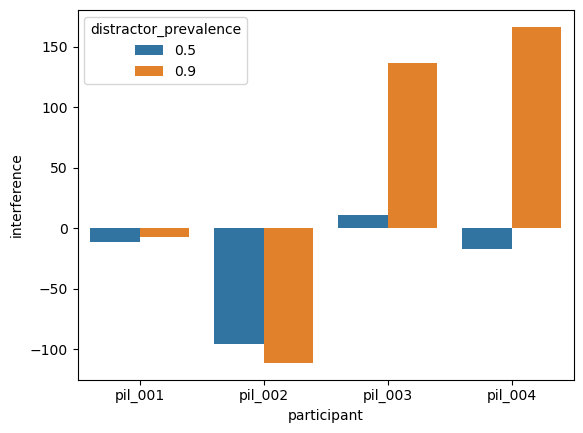

In [43]:
# visualize interference for two distractor prevalences from m_rt
sns.barplot(x='participant', y='interference', hue='distractor_prevalence', data=m_rt)
plt.show()